<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mzura\\PycharmProjects\\project_root\\notebooks\\results\\figures\\histograms.png'

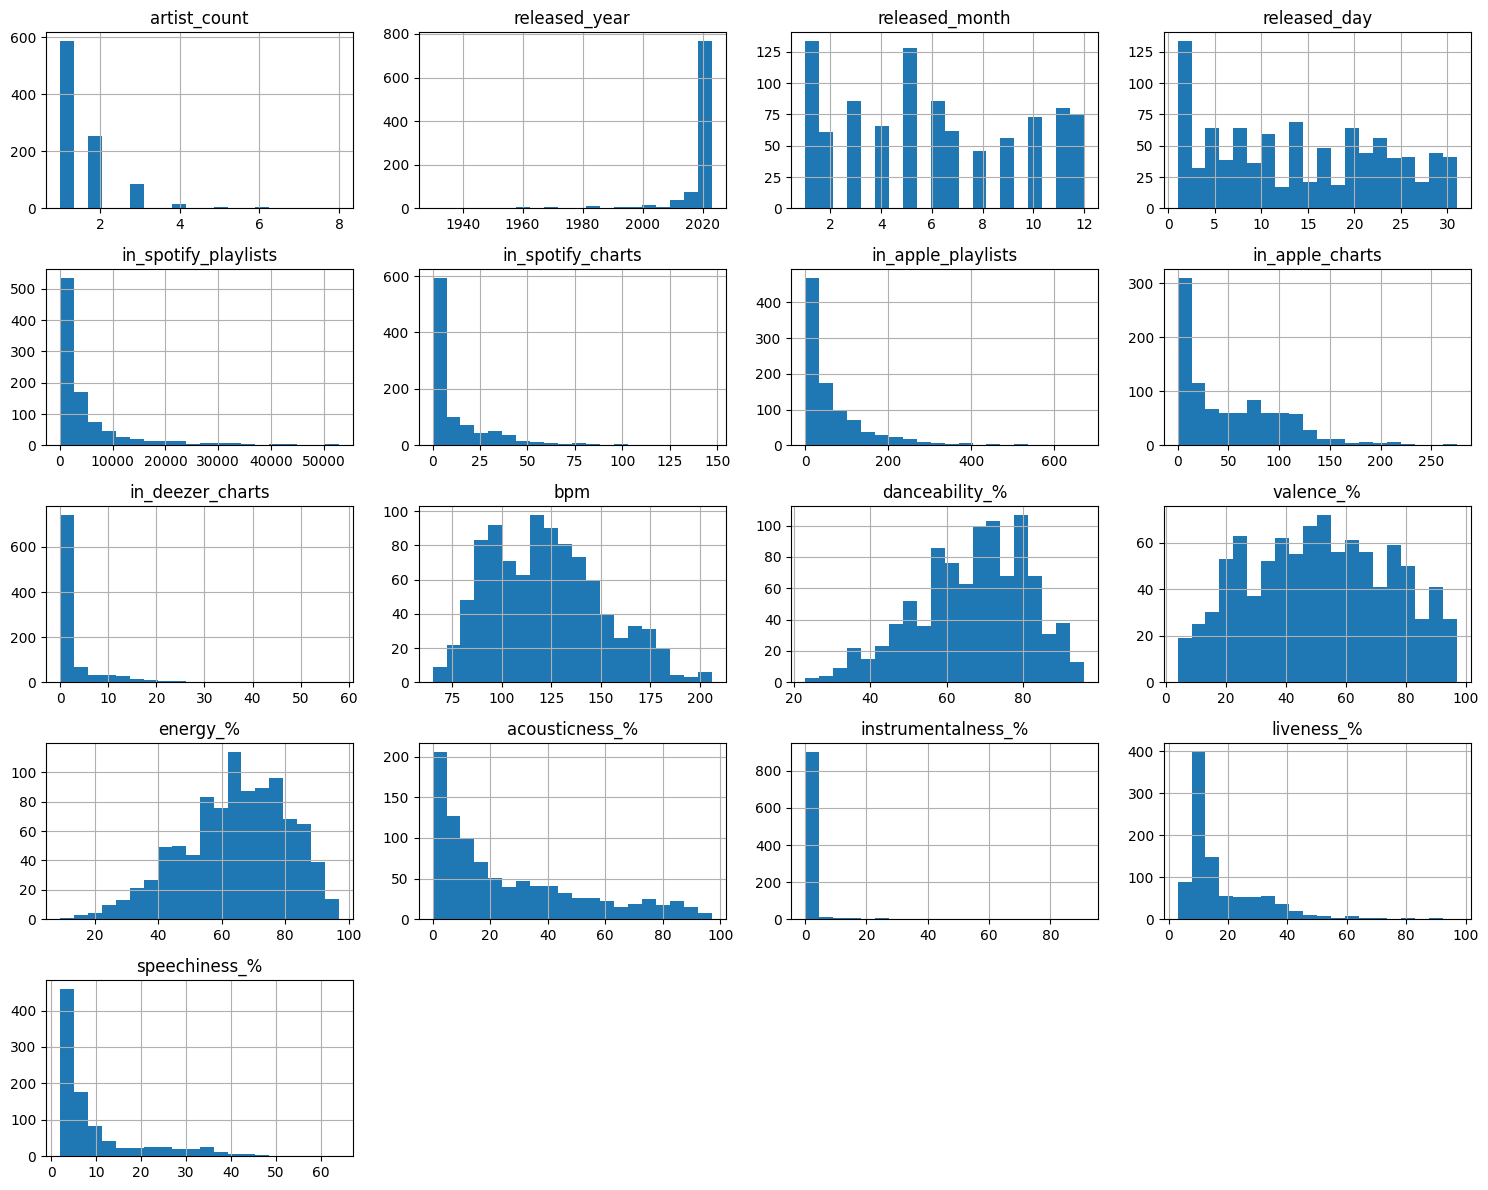

In [2]:
import sys
sys.path.append('..')

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_analysis import calculate_summary_statistics
from src.visualization import plot_histograms, plot_scatter

# Load the cleaned data
df = pd.read_csv('../data/processed/cleaned_dataset.csv')

# Display basic information about the dataset
print(df.info())
print("\nColumn names:")
print(df.columns)

# Calculate and display summary statistics
summary_stats = calculate_summary_statistics(df)
print("\nSummary Statistics:")
print(summary_stats)

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric columns:")
print(numeric_columns)

# Create correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Ensure the results directory exists
os.makedirs('../results/figures', exist_ok=True)

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.savefig('../results/figures/correlation_matrix.png')
plt.close()

# Plot histograms for numeric columns
plot_histograms(df[numeric_columns])

# Plot scatter plots for a few interesting numeric column pairs
# Replace these with column names that are relevant to your analysis
plot_scatter(df, 'streams', 'in_spotify_playlists')
plot_scatter(df, 'bpm', 'danceability_%')

print("Exploratory data analysis completed. Check the '../results/figures' directory for generated plots.")